In [70]:
import pandas as pd 
import statistics
from statistics import mean,pstdev
import matplotlib.pyplot as plt
import numpy as np


   no.      1      2      3      4
0    1  15.85  16.02  15.83  15.94
1    2  16.12  16.00  15.85  16.01
2    3  16.00  15.91  15.94  15.83
3    4  16.20  15.85  15.74  15.93
4    5  15.74  15.86  16.21  16.10
5    6  15.94  16.01  16.14  16.03
6    7  15.75  16.21  16.01  15.86
7    8  15.82  15.94  16.02  15.94
8    9  16.04  15.98  15.83  15.98
9   10  15.64  15.86  15.94  15.89


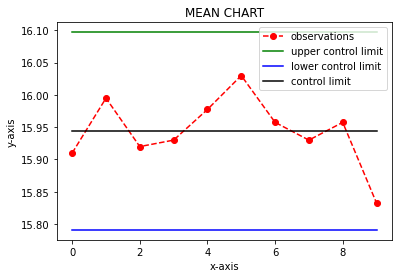

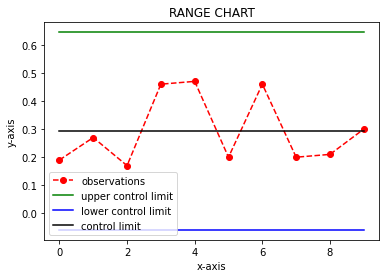

In [90]:
df = pd.read_excel("data.xlsx")
print(df)
mean_ls=[]
range_ls=[]
for i in range(10):
    row = df.iloc[i,1:]
    range_ls.append(row.max()-row.min())
    mean_ls.append(row.mean())
mean_str_rounded_ls = [ '%.5f' % elem for elem in mean_ls ]
integer_map = map(float,mean_str_rounded_ls)
mean_rounded_ls = list(integer_map)
range_str_rounded_ls = [ '%.5f' % elem for elem in range_ls ]
integer_mapp = map(float,range_str_rounded_ls)
range_rounded_ls = list(integer_mapp)
meanchart_control_limit = round(mean(mean_rounded_ls),5)
rangechart_control_limit = round(mean(range_rounded_ls),5)
m_sd = statistics.pstdev(mean_rounded_ls)
m_upper_control_limit = meanchart_control_limit + 3*m_sd
m_lower_control_limit = meanchart_control_limit - 3*m_sd
r_sd = statistics.pstdev(range_rounded_ls)
r_upper_control_limit = rangechart_control_limit + 3*r_sd
r_lower_control_limit = rangechart_control_limit - 3*r_sd
m_arr = np.array(mean_rounded_ls)
m_uc_arr = np.ones(len(mean_rounded_ls))*m_upper_control_limit
m_lc_arr = np.ones(len(mean_rounded_ls))*m_lower_control_limit
m_c_arr = np.ones(len(mean_rounded_ls))*meanchart_control_limit
plt.plot(m_arr, marker='o', linestyle='--', color='r', label='observations') 
plt.plot(m_uc_arr,linestyle='-',color='g', label='upper control limit') 
plt.plot(m_lc_arr,linestyle='-', color='b', label='lower control limit') 
plt.plot(m_c_arr,linestyle='-', color='black', label='control limit') 
plt.xlabel('x-axis')
plt.ylabel('y-axis') 
plt.title('MEAN CHART')
plt.legend() 
plt.show()
r_arr = np.array(range_rounded_ls)
r_uc_arr = np.ones(len(range_rounded_ls))*r_upper_control_limit
r_lc_arr = np.ones(len(range_rounded_ls))*r_lower_control_limit
r_c_arr = np.ones(len(range_rounded_ls))*rangechart_control_limit
plt.plot(r_arr, marker='o', linestyle='--', color='r', label='observations') 
plt.plot(r_uc_arr,linestyle='-',color='g', label='upper control limit') 
plt.plot(r_lc_arr,linestyle='-', color='b', label='lower control limit') 
plt.plot(r_c_arr,linestyle='-', color='black', label='control limit') 
plt.xlabel('x-axis')
plt.ylabel('y-axis') 
plt.title('RANGE CHART')
plt.legend() 
plt.show()
